In [5]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows 한글 폰트
matplotlib.rcParams['font.size'] = '10' # font size
matplotlib.rcParams['axes.unicode_minus'] = False # - 기호 깨짐 현상을 해결함
import numpy as np

In [146]:
import pandas as pd
#df = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,thousands = ',',index_col='행정기관',usecols='B,E:Y')
df = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,nrows=1,index_col='행정기관',usecols='B,E:Y')
df1 = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,nrows=1,index_col='행정기관',usecols='B,AY:BS')
df2 = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,nrows=1,index_col='행정기관',usecols='B,CS:DM')
df3 = pd.read_excel('../z20_data/20230104_연령별인구현황.xlsx',skiprows=3,nrows=1,index_col='행정기관',usecols='B,AY:BS')
df

c:\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"726,460","1,072,653","1,211,077","1,211,949","1,524,378","1,823,908","1,737,714","1,684,266","2,055,130","2,039,606",...,"2,052,227","2,097,254","1,554,976","1,038,388","713,448","507,915","212,726","54,180","8,880","1,307"


In [137]:
df.index
df1.index

Index(['전국  '], dtype='object', name='행정기관')

In [140]:
df.columns
df1.columns

Index(['0~4세.2', '5~9세.2', '10~14세.2', '15~19세.2', '20~24세.2', '25~29세.2',
       '30~34세.2', '35~39세.2', '40~44세.2', '45~49세.2', '50~54세.2', '55~59세.2',
       '60~64세.2', '65~69세.2', '70~74세.2', '75~79세.2', '80~84세.2', '85~89세.2',
       '90~94세.2', '95~99세.2', '100세 이상.2'],
      dtype='object')

In [147]:
df.loc['전국  '] = df.loc['전국  '].str.replace(',','').astype(int)
df1.loc['전국  '] = df1.loc['전국  '].str.replace(',','').astype(int)

In [148]:
df.loc['전국  ']
df1.loc['전국  ']


0~4세.2        722848
5~9세.2       1067962
10~14세.2     1210328
15~19세.2     1210202
20~24세.2     1516184
25~29세.2     1816653
30~34세.2     1738039
35~39세.2     1676299
40~44세.2     2058847
45~49세.2     2038344
50~54세.2     2302357
55~59세.2     2054837
60~64세.2     2102187
65~69세.2     1563546
70~74세.2     1039913
75~79세.2      714082
80~84세.2      513601
85~89세.2      214782
90~94세.2       54804
95~99세.2        9005
100세 이상.2       1391
Name: 전국  , dtype: object

In [149]:
df['0~14세'] = df.loc['전국  '][0:3].sum()
df1['0~14세'] = df1.loc['전국  '][0:3].sum()

df['15~64세'] = df.loc['전국  '][3:13].sum() # 3~12 18529528
df1['15~64세'] = df1.loc['전국  '][3:13].sum() # 3~12 18529528

df['65세 이상'] = df.loc['전국  '][13:21].sum() #13~20 4091820
df1['65세 이상'] = df1.loc['전국  '][13:21].sum() #13~20 4091820

In [151]:
df1

,0~4세.2,5~9세.2,10~14세.2,15~19세.2,20~24세.2,25~29세.2,30~34세.2,35~39세.2,40~44세.2,45~49세.2,...,70~74세.2,75~79세.2,80~84세.2,85~89세.2,90~94세.2,95~99세.2,100세 이상.2,0~14세,15~64세,65세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,722848,1067962,1210328,1210202,1516184,1816653,1738039,1676299,2058847,2038344,...,1039913,714082,513601,214782,54804,9005,1391,3001138,18513949,4111124


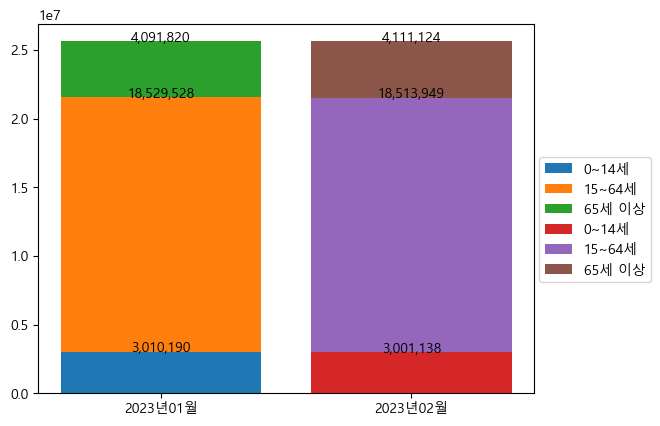

In [152]:
x = '2023년01월'
y1 = df.loc['전국  ']['0~14세']
y2 = df.loc['전국  ']['15~64세']
y3 = df.loc['전국  ']['65세 이상']

x1 = '2023년02월'
y11 = df1.loc['전국  ']['0~14세']
y21 = df1.loc['전국  ']['15~64세']
y31 = df1.loc['전국  ']['65세 이상']

for i in range(2):
    
    x+f'{i}' = f'2023년0{i+1}월'
    y1 = df.loc['전국  ']['0~14세']
    y2 = df.loc['전국  ']['15~64세']
    y3 = df.loc['전국  ']['65세 이상']

plt.bar(x,y1,label='0~14세')
plt.bar(x,y2,bottom=y1,label='15~64세')
plt.bar(x,y3,bottom=y1+y2, label='65세 이상')

plt.bar(x1,y11,label='0~14세')
plt.bar(x1,y21,bottom=y11,label='15~64세')
plt.bar(x1,y31,bottom=y11+y21, label='65세 이상')
plt.legend(loc=(1.01,0.3))

plt.text(x,y1,f'{y1:,}',ha='center')
plt.text(x,y1+y2,f'{y2:,}',ha='center')
plt.text(x,y1+y2+y3,f'{y3:,}',ha='center')

plt.text(x1,y11,f'{y11:,}',ha='center')
plt.text(x1,y11+y21,f'{y21:,}',ha='center')
plt.text(x1,y11+y21+y31,f'{y31:,}',ha='center')

plt.show()